In [ ]:
import csv
import numpy as np
import math
from scipy.special import expit
from sklearn.metrics import confusion_matrix, accuracy_score
import random
import sklearn.metrics as mt


In [ ]:
from sklearn.model_selection import train_test_split

def load_data():
  f = open("mnist_train.csv","r")
  data0 = csv.reader(f)
  train = np.array(list(data0), dtype=np.int32)
  train_data, val_data = train_test_split(train, test_size=0.2)
  f1 = open("mnist_test.csv","r")
  data1 = csv.reader(f1)
  test = np.array(list(data1), dtype=np.int32)
  return train_data, val_data, test

In [ ]:
# Hyper Paramater
bias = 1
lear_rate = 0.1
alpha = 0.9
n = 100

In [ ]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

In [ ]:
class Multi_Perceptron():
  def __init__(self, train_data, train_val, test):
    self.train_data = train_data
    self.train_val = train_val
    self.test = test
    
    # Khởi tạo weight
    self.weight_1 = np.random.uniform(-0.05,0.05,(785,n)) # 785 x 100: R x S /// S x R
    # print(weight_i2h.shape)

    self.weight_2 = np.random.uniform(-0.05,0.05,(n+1,10))
    # print(weight_h20.shape)

    # store previous delta wt from hidden to output layer
    self.prev_wt_2 = np.zeros((n+1,10))

    # store previous delta wt from input to hidden layer
    self.prev_wt_1 = np.zeros((785,n))
    self.accuracy_val = []
    self.accuracy_train = []
    self.loss_function = []
    self.perfect_w_1 = None
    self.perfect_w_2 = None

  def fit(self, epochs):
    np.random.shuffle(self.train_data)
    val_index = 0
    for epoch in range(epochs):
      predict_list = []
      actual_list = []
      pre_label_val = []
      actual_label_val = []
      if(val_index == 0):
        self.perfect_w_1 = self.weight_1
        self.perfect_w_2 = self.weight_2
      for i in range(self.train_data.shape[0]):
          target_class = self.train_data[i,0].astype('int')
          actual_list.append(target_class)    
          pi = self.train_data[i].astype('float16')/255
          pi[0] = bias            ## Set the value of x0 to bias unit = 1
          pi = pi.reshape(1,785)

          n_1 = np.dot(pi, self.weight_1)
          a_1 = sigmoid(n_1)
          # print("sig_hl",sig_hl.shape)
          hl2_input = np.zeros((1,n+1))
          hl2_input[0,0] = 1
          hl2_input[0,1:] = a_1
          # print("hl_input",hl_input)
          # print(hl_input.shape)
          n_2 = np.dot(hl2_input, self.weight_2)
          a_2 = sigmoid(n_2)
          # print(sig_ol)
          predict = np.argmax(a_2)
          # print(predict)
          predict_list.append(predict)

          #Update:
          tk = np.zeros((1,10))+0.1
          tk[0,target_class] = 0.9
          # print(tk)
          s_2 = -2 * a_2*(1-a_2)* (tk - a_2)
          # print("error_ol shape for ",epoch," ",error_ol.shape)
          ##error term for hidden unit
          s_1 = a_1*(1-a_1)*np.dot(s_2, self.weight_2[1:,:].T) 
          # print(delta_hl.shape)
          # print("error_hl shape for ",epoch," ",error_hl.shape)
          ####### Update weights ##########

          ### Hidden to output layer wt updation

          delta_weight_h2 = (lear_rate * s_2 * hl2_input.T) + (alpha * self.prev_wt_2)
          self.prev_wt_2 = delta_weight_h2
          # print("delta_weight_h20.shape after wt updation", delta_weight_h20.shape)
          self.weight_2 = self.weight_2 - delta_weight_h2


          ### Input to output layer wt updation    

          delta_weight_h1 = (lear_rate * s_1 * pi.T) + (alpha * self.prev_wt_1) 
          self.prev_wt_1 = delta_weight_h1
          # print("delta_weight_i2h.shape after wt updation", delta_weight_i2h.shape)
          self.weight_1 = self.weight_1 - delta_weight_h1

      #### Validation ####
      accur_val = 0
      MSE_loss = 0
      for val in range(self.train_val.shape[0]):
        tar_class = self.train_val[val, 0].astype('int')
        actual_label_val.append(tar_class)
        pi = self.train_val[val].astype('float16')/255
        pi[0] = bias            ## Set the value of x0 to bias unit = 1
        pi = pi.reshape(1,785)

        n_1 = np.dot(pi, self.weight_1)
        a_1 = sigmoid(n_1)
        # print("sig_hl",sig_hl.shape)
        hl2_input = np.zeros((1,n+1))
        hl2_input[0,0] = 1
        hl2_input[0,1:] = a_1
        # print("hl_input",hl_input)
        # print(hl_input.shape)
        n_2 = np.dot(hl2_input, self.weight_2)
        a_2 = sigmoid(n_2)
        # print(sig_ol)
        predict = np.argmax(a_2)
        # print(predict)
        pre_label_val.append(predict)
        MSE_loss += (tar_class - predict)**2


      accur = (np.array(predict_list) == np.array(actual_list)).sum()/float(len(actual_list))*100
      accur_val = (np.array(pre_label_val) == np.array(actual_label_val)).sum()/float(len(actual_label_val))*100
      MSE_loss = MSE_loss/len(actual_label_val)
      self.loss_function.append(MSE_loss)
      self.accuracy_val.append(accur_val)
      self.accuracy_train.append(accur)
      # print("len of actual_list after ", epoch," is ",len(actual_list))
      # print("len of pred_list after ", epoch," is ",len(predict_list))
      print('Epoch {}: accurancy_train = {}, accuracy_val = {}, loss = {} \n {}'.format(epoch+1, accur, accur_val, MSE_loss, confusion_matrix(predict_list, actual_list)))
      if(epoch != 0):
        print('Epoch {}:loss = {}, loss_before = {}'.format(epoch+1, MSE_loss, self.loss_function[epoch-1]))
      ### Kiểm tra overfitting ####
      if(epoch == 0):
        pass
      else:
        if(self.loss_function[epoch] > self.loss_function[epoch-1]):
          if(val_index == 3):
            print('Early Stop Trainning!!! ')
            break
        else:
          val_index = 0

    return predict_list, actual_list, accur
  def confuse_matrix(self, predict_list, actual_list):
    print(confusion_matrix(actual_list,predict_list))  

  def save_model(self):
    np.savetxt('w_1.csv', self.perfect_w_1)
    np.savetxt('w_2.csv', self.perfect_w_2)
  
  def load_mode(self):
    self.weight_1 = np.loadtxt('w_1.csv')
    self.weight_2 = np.loadtxt('w_2.csv')

  def test_model(self):
    true_labels = []
    predict_labels = []
    for i in range(len(self.test)):
      true_label = self.test[i,0].astype('int')
      true_labels.append(true_label)

      pi = self.test[i].astype('float16')/255
      pi[0] = bias            ## Set the value of x0 to bias unit = 1
      pi = pi.reshape(1,785)

      n_1 = np.dot(pi, self.weight_1)
      a_1 = sigmoid(n_1)
      # print("sig_hl",sig_hl.shape)
      hl2_input = np.zeros((1,n+1))
      hl2_input[0,0] = 1
      hl2_input[0,1:] = a_1
      n_2 = np.dot(hl2_input, self.weight_2)
      a_2 = sigmoid(n_2)
      # print(sig_ol)
      predict = np.argmax(a_2)
      # print(predict)
      predict_labels.append(predict)
    # accuracy, F1, presion, recall
    accuracy_ = mt.accuracy_score(true_labels, predict_labels)
    F1_score = mt.f1_score(true_labels, predict_labels, average='macro')
    precision = mt.precision_score(true_labels, predict_labels, average='macro')
    recall = mt.recall_score(true_labels, predict_labels, average='macro')
    return accuracy_, F1_score, precision, recall



In [ ]:
train, val, test = load_data()

In [ ]:
Model = Multi_Perceptron(train, val, test)
pre, true_label, acc = Model.fit(50)

Epoch 1: accurancy_train = 90.70416666666667, accuracy_val = 93.38333333333333, loss = 1.2073333333333334 
 [[4528    4   50   24   18   67   54   30   23   30]
 [   0 5162   24   20   18   17   21   32   50   13]
 [  24   36 4274  132   35   23   36   61   53   16]
 [  17   23   90 4251    7  171    9   41  112   72]
 [   6   20   57    8 4209   30   44   51   23  176]
 [  23   11    6  136    9 3791   67    8   77   39]
 [  47   11   62   22   62   76 4403    6   36   12]
 [  10   11   78   59   20   18    1 4560   14  143]
 [  93   72  140  197   55  101   78   43 4258  126]
 [  11   13   18   44  236   46    6  177   74 4102]]
Epoch 2: accurancy_train = 94.58333333333333, accuracy_val = 93.77499999999999, loss = 0.9223333333333333 
 [[4601    1   28   13   10   22   33    8   17   22]
 [   0 5239   14    5   14    7    8   14   29   12]
 [  14   34 4510   90   15   12   12   45   29    7]
 [  11   20   42 4474    2   75    2   19   54   45]
 [   8    7   15    3 4404   14   25   28

In [ ]:
Model.test_model()

(0.9331, 0.9318325989864895, 0.9353124387873908, 0.9330689880116037)

In [ ]:
Model.save_model()

In [ ]:
rebuild = Multi_Perceptron(train, val, test)
rebuild.load_mode()

In [ ]:
rebuild.test_model()

(0.9334, 0.9328203428251955, 0.9355174755619435, 0.9333487650759638)

Text(0, 0.5, 'Loss')

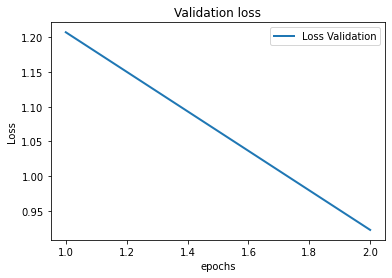

In [ ]:
import matplotlib.pyplot as plt

val_loss = Model.loss_function
epochs = len(val_loss)
x_ = np.linspace(1, epochs, epochs)
y_ = val_loss
ax = plt.subplot(111) 

line, = plt.plot(x_, y_, lw=2)

ax.legend(('Loss Validation', 'Dot product'))
ax.set_title("Validation loss")
ax.set_xlabel('epochs')
ax.set_ylabel('Loss')

Text(0, 0.5, 'Accuracy')

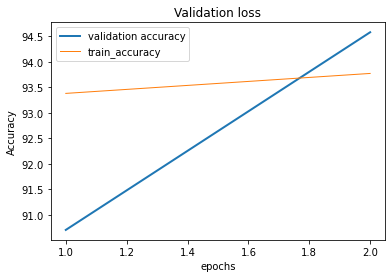

In [ ]:
train_acc = Model.accuracy_train
val_acc = Model.accuracy_val
epochs = len(train_acc)
x_ = np.linspace(1, epochs, epochs)
y_train = train_acc
y_val = val_acc
ax = plt.subplot(111) 

line, = plt.plot(x_, y_train, lw=2)
line, = plt.plot(x_, y_val, lw=1)
ax.legend(('validation accuracy', 'train_accuracy'))
ax.set_title("Validation loss")
ax.set_xlabel('epochs')
ax.set_ylabel('Accuracy')